In [3]:
from google.colab import files
uploaded = files.upload()

Saving data.parquet to data.parquet


In [4]:
import pandas as pd
df = pd.read_parquet("data.parquet")
df.head()

,banknifty,nifty,tte
time,,,
2021-01-01 09:15:00,0.286058,0.199729,27
2021-01-01 09:16:00,0.285381,0.200433,27
2021-01-01 09:17:00,0.284233,0.200004,27
2021-01-01 09:18:00,0.286104,0.199860,27
2021-01-01 09:19:00,0.285539,0.198951,27


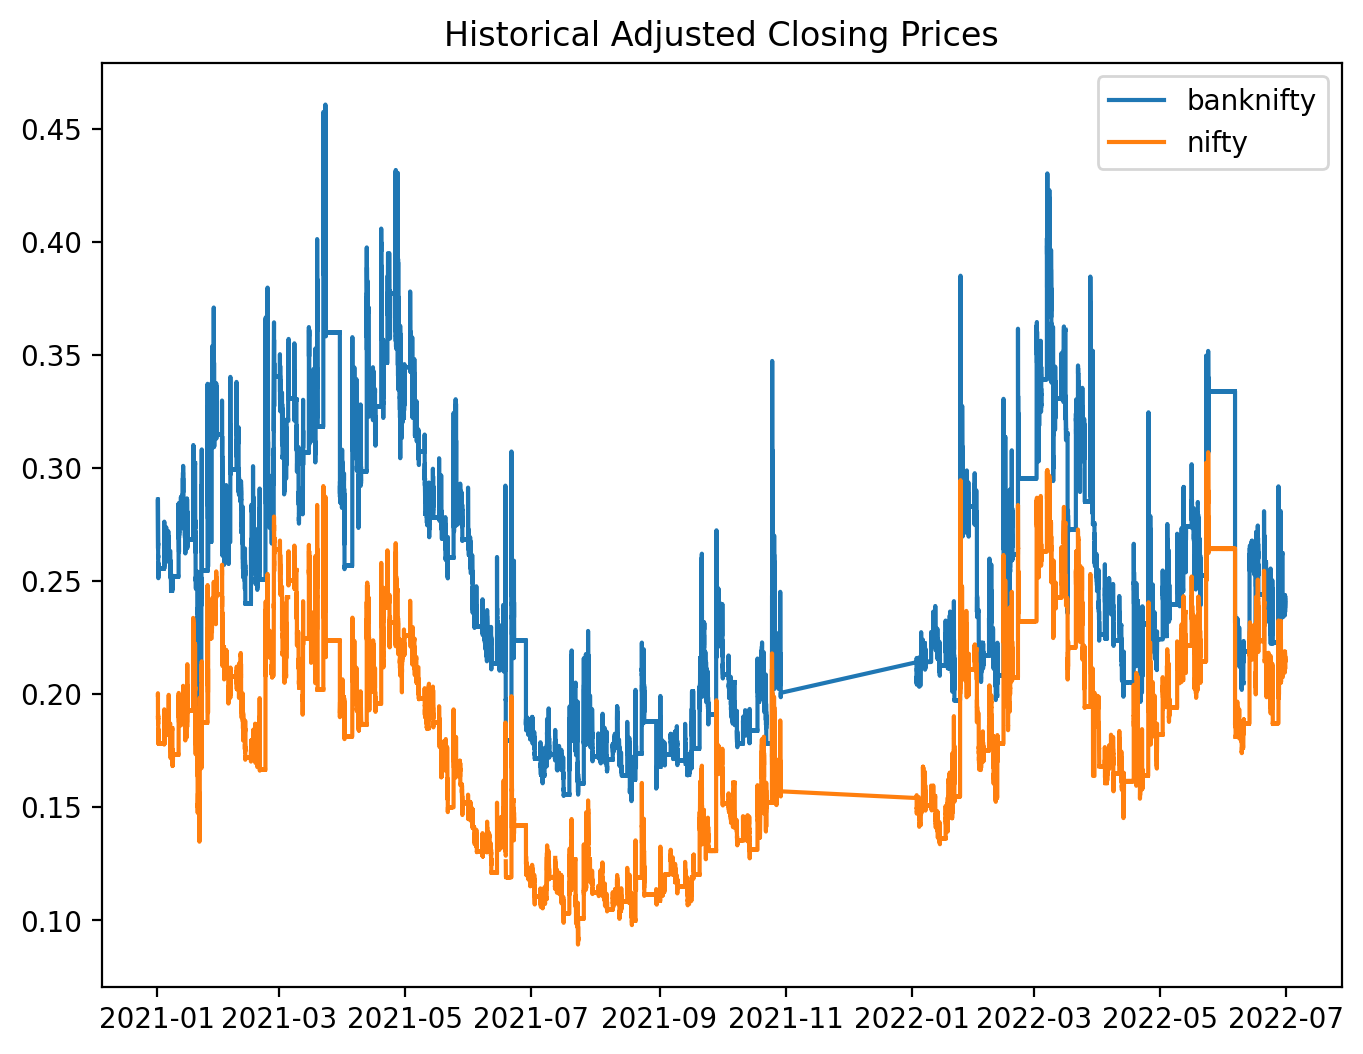

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=200)
plt.plot(df["banknifty"], label="banknifty")
plt.plot(df["nifty"], label="nifty")
plt.title('Historical Adjusted Closing Prices')
plt.legend()
plt.show()


From the above, it can be ASSUMED that the two are correlated

Text(0.5, 1.0, 'Spread')

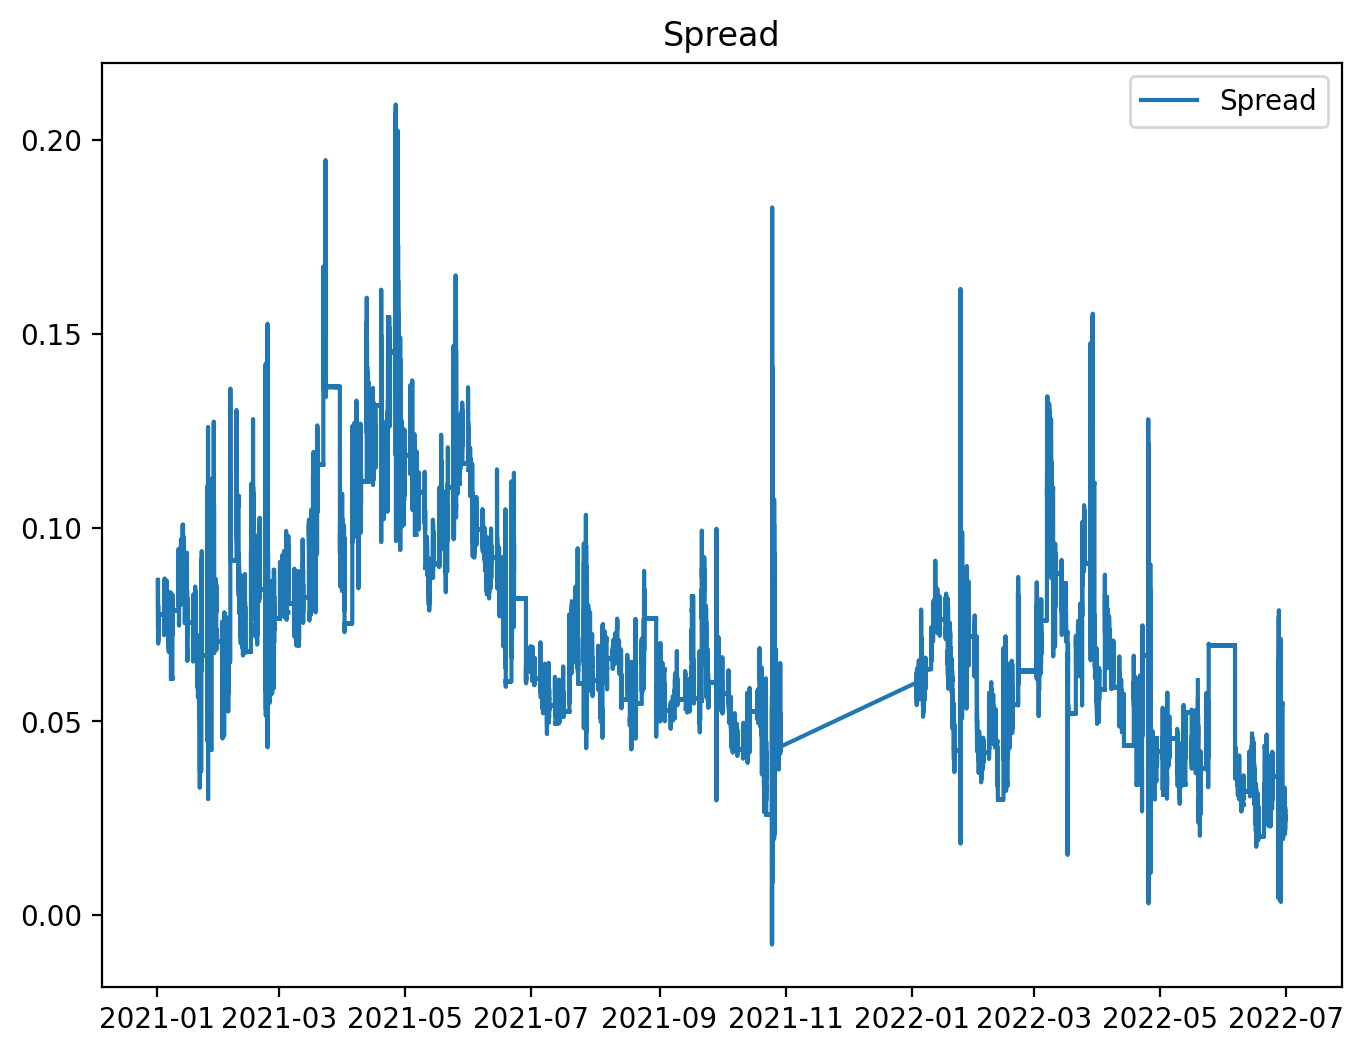

In [6]:
figure(figsize=(8, 6), dpi=200)
plt.plot(df["banknifty"]-df["nifty"], label = 'Spread')
plt.legend()
plt.title("Spread")

ALSO, instead of spread we can equivalently use price ratio as it also captures the

Text(0.5, 1.0, 'Price Ratio')

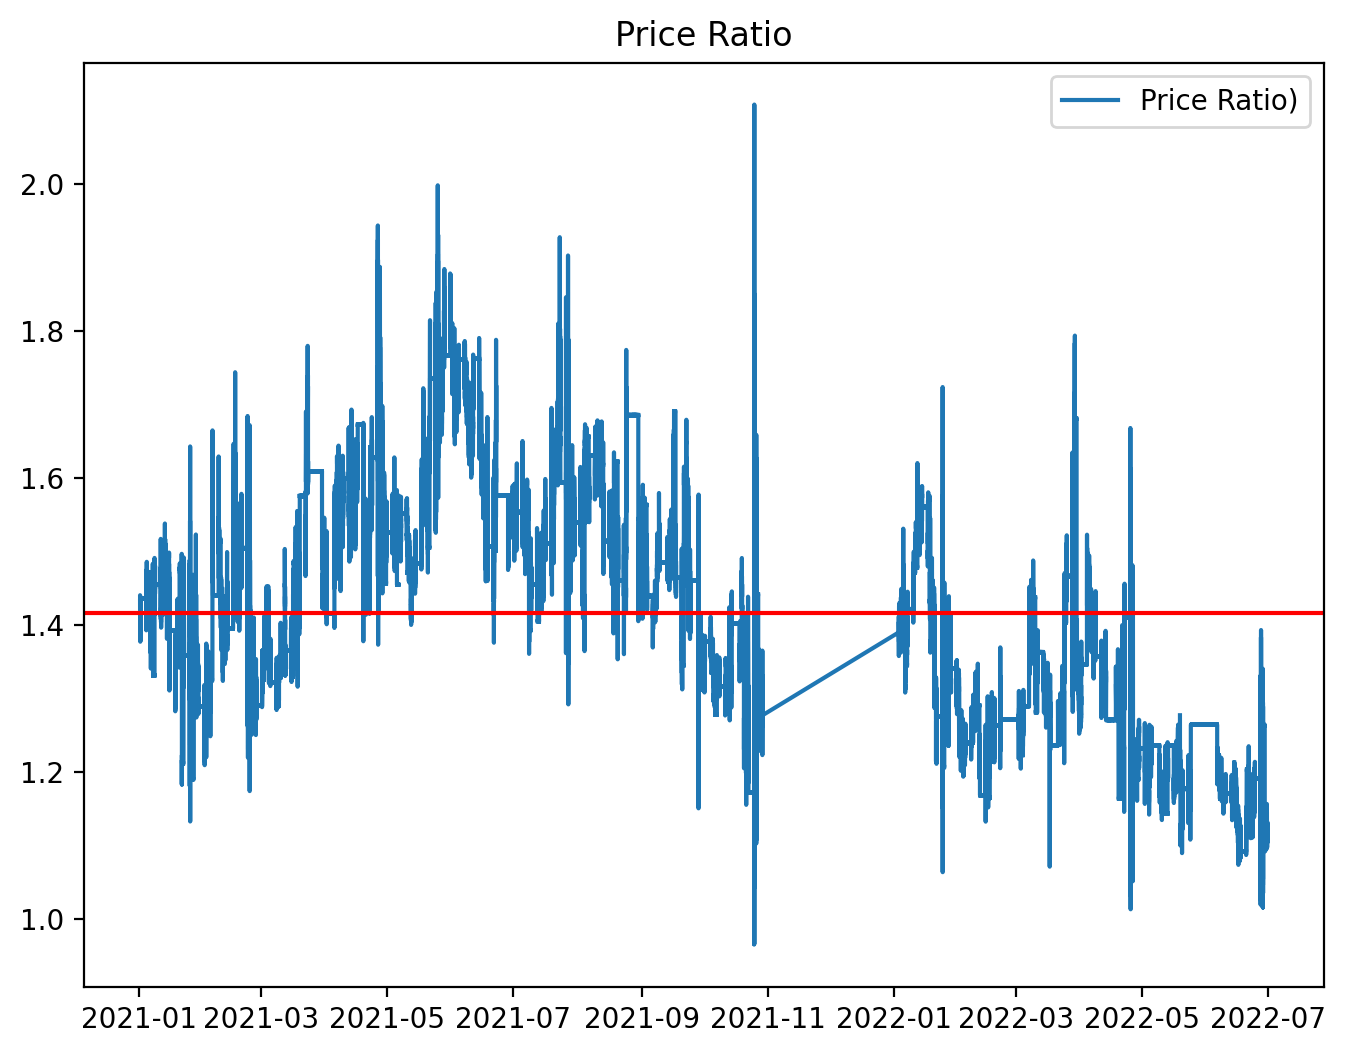

In [7]:
figure(figsize=(8, 6), dpi=200)
ratio =df["banknifty"]/df["nifty"]
plt.plot(ratio, label = 'Price Ratio)')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio")

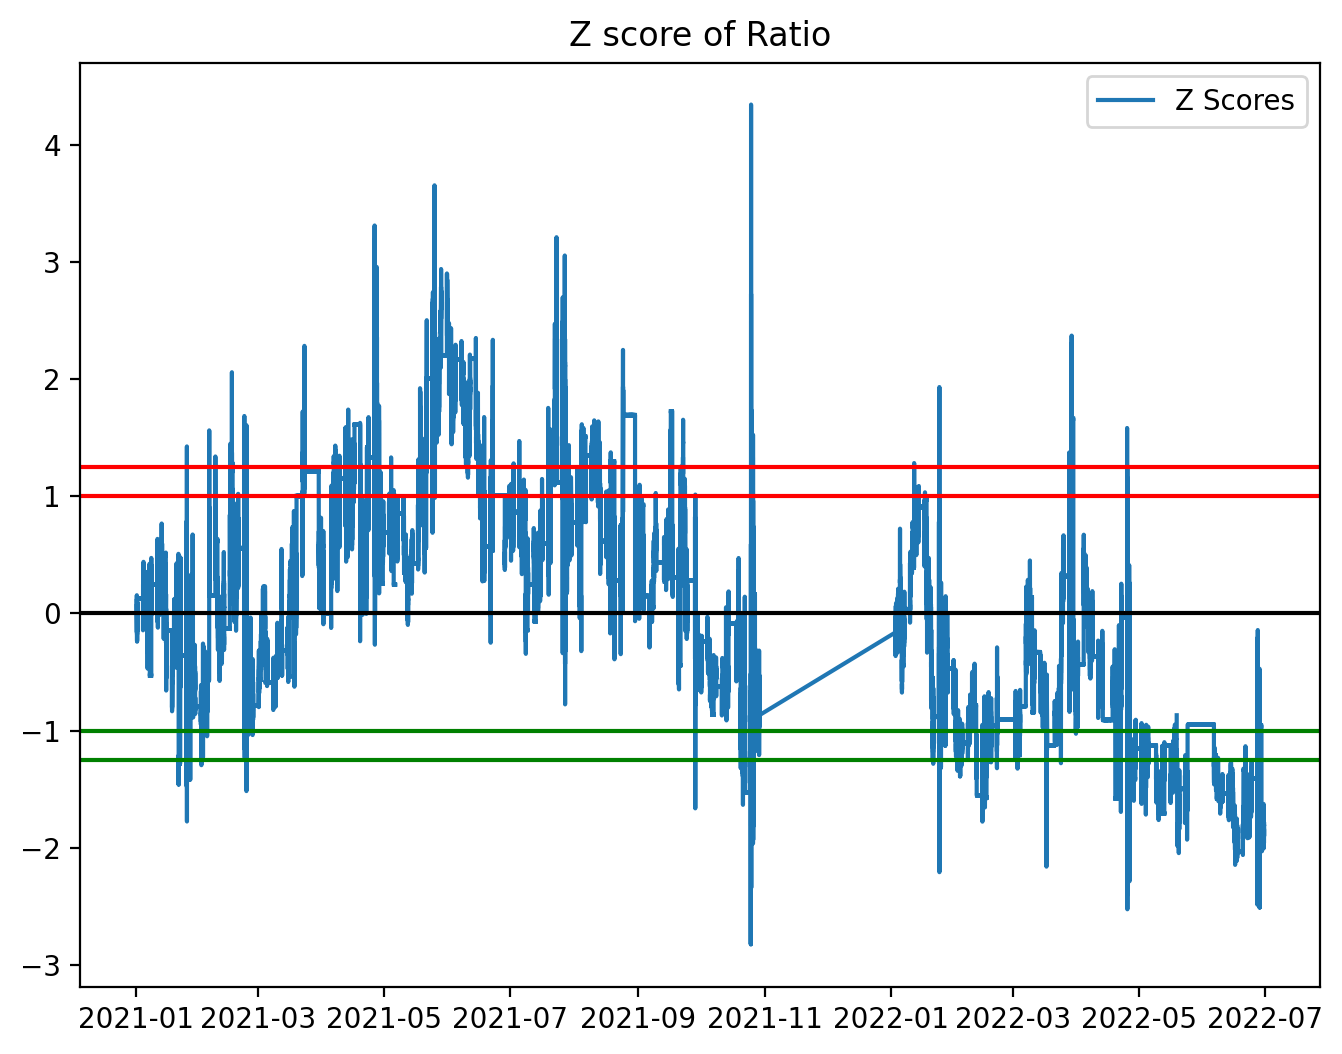

In [8]:

figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red')
plt.axhline(-1.0, color='green')
plt.axhline(-1.25, color='green')
plt.legend(loc = 'best')
plt.title('Z score of Ratio')
plt.show()


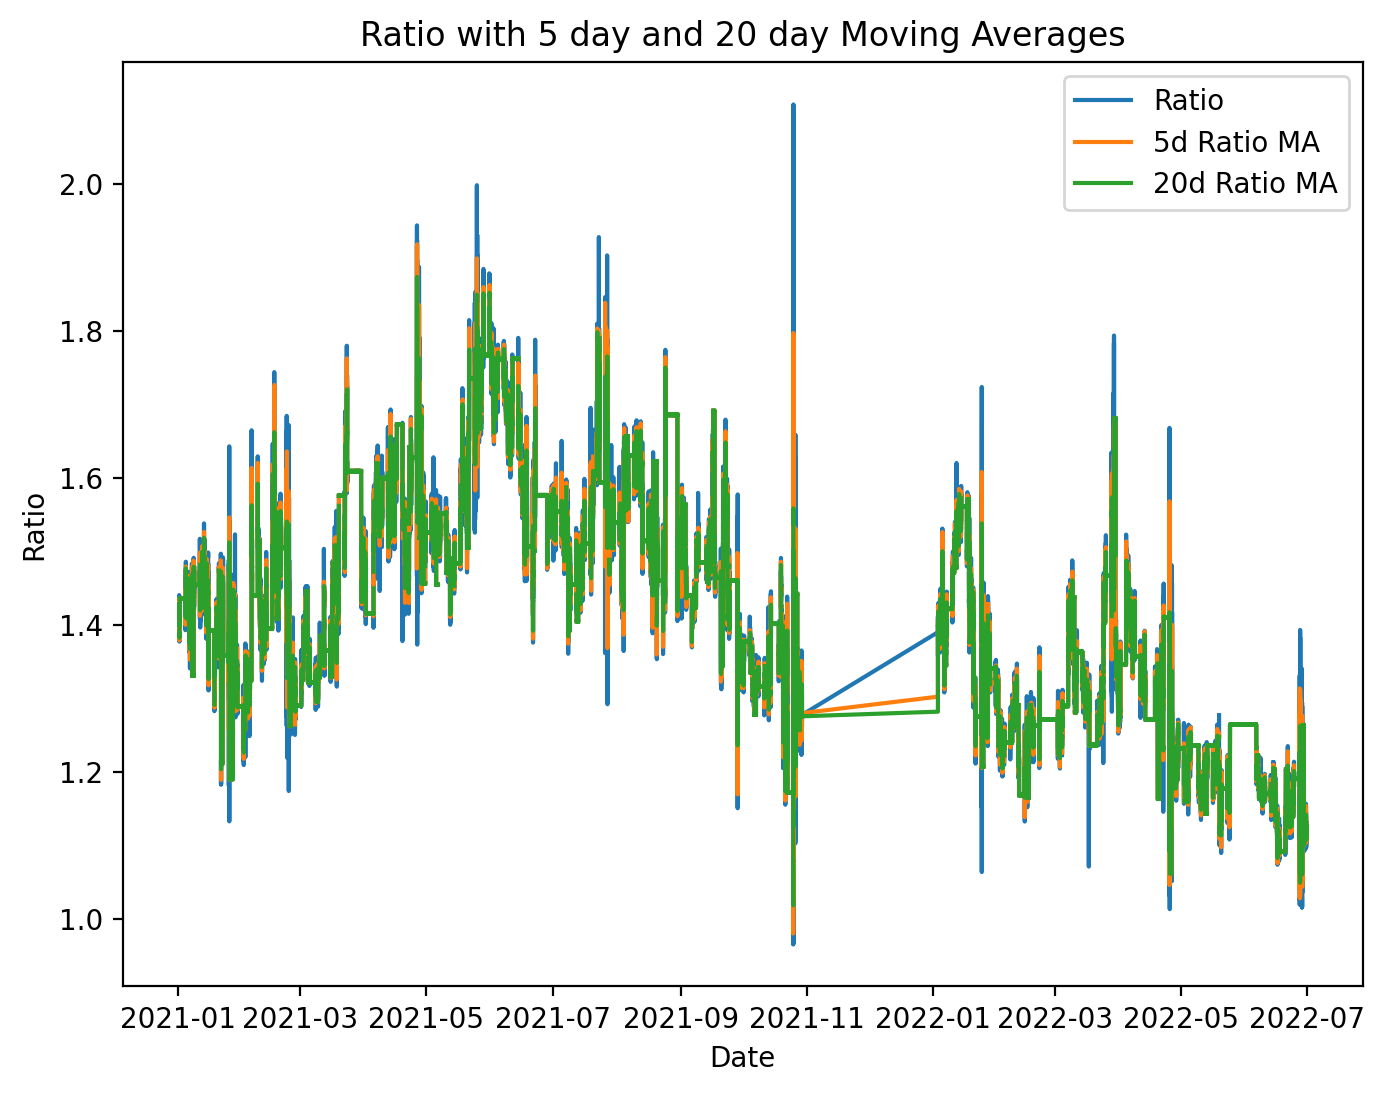

In [9]:
figure(figsize=(8, 6), dpi=200)
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Ratio with 5 day and 20 day Moving Averages')
plt.show()

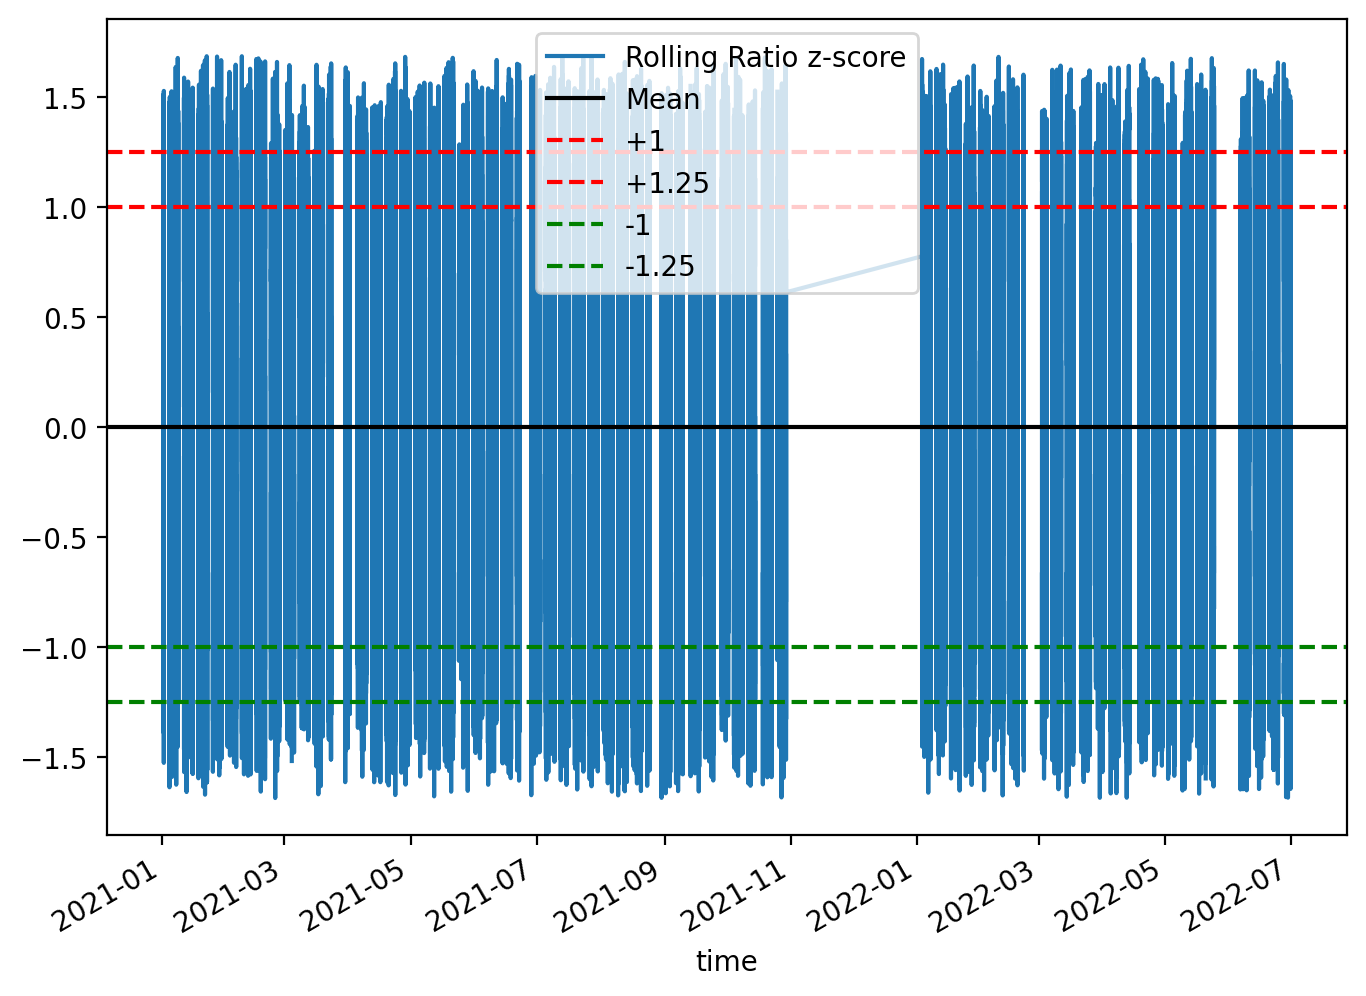

In [10]:
figure(figsize=(8, 6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

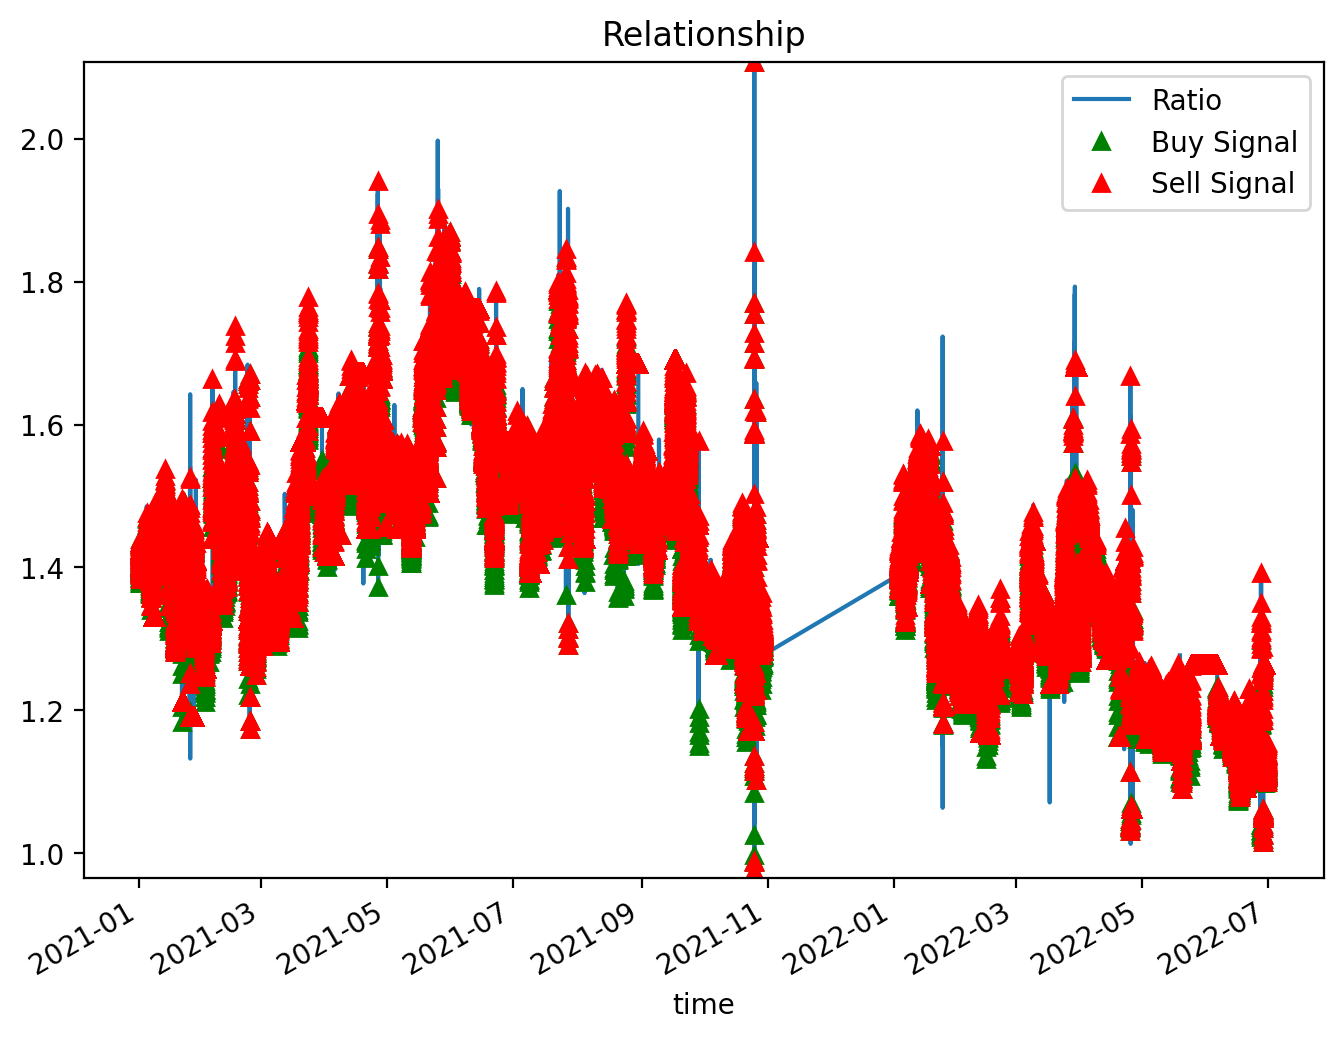

In [11]:
figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship')
plt.show()